# Effective Priors

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde,kde

matplotlib.rcParams['axes.linewidth'] = 4
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['axes.labelsize'] = 75
matplotlib.rcParams['xtick.labelsize'] = 50 
matplotlib.rcParams['ytick.labelsize'] = 50
matplotlib.rcParams['legend.fontsize'] = 50
matplotlib.rcParams['axes.labelpad'] =  10

In [2]:
def plot(x,y,nbins):
    k = kde.gaussian_kde([x,y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
    plt.pcolormesh(xi, yi, zi.reshape(xi.shape),cmap='hot')

## Uniform Priors from Smith et al arXiv:1908.06995

        log10z_c = uniform(3.1,4.2)
        fEDE = uniform(0.01,.25)
        thetai_scf = uniform(0.1,3.0)



In [3]:
# Load in the precomputed data
logf = np.load("../figures-for-paper/priors/data/log10f_scf-shooting-Smith.npy")
logm = np.load("../figures-for-paper/priors/data/log10m_scf-shooting-Smith.npy")
theta = np.load("../figures-for-paper/priors/data/thetai_scf-shooting-Smith.npy")
use = np.where(logf != 0)
logf, logm, theta = logf[use], logm[use], theta[use]

# Normalize to the Plank mass
logfmpl = np.log10((np.power(10,logf)/(2.435e27)))

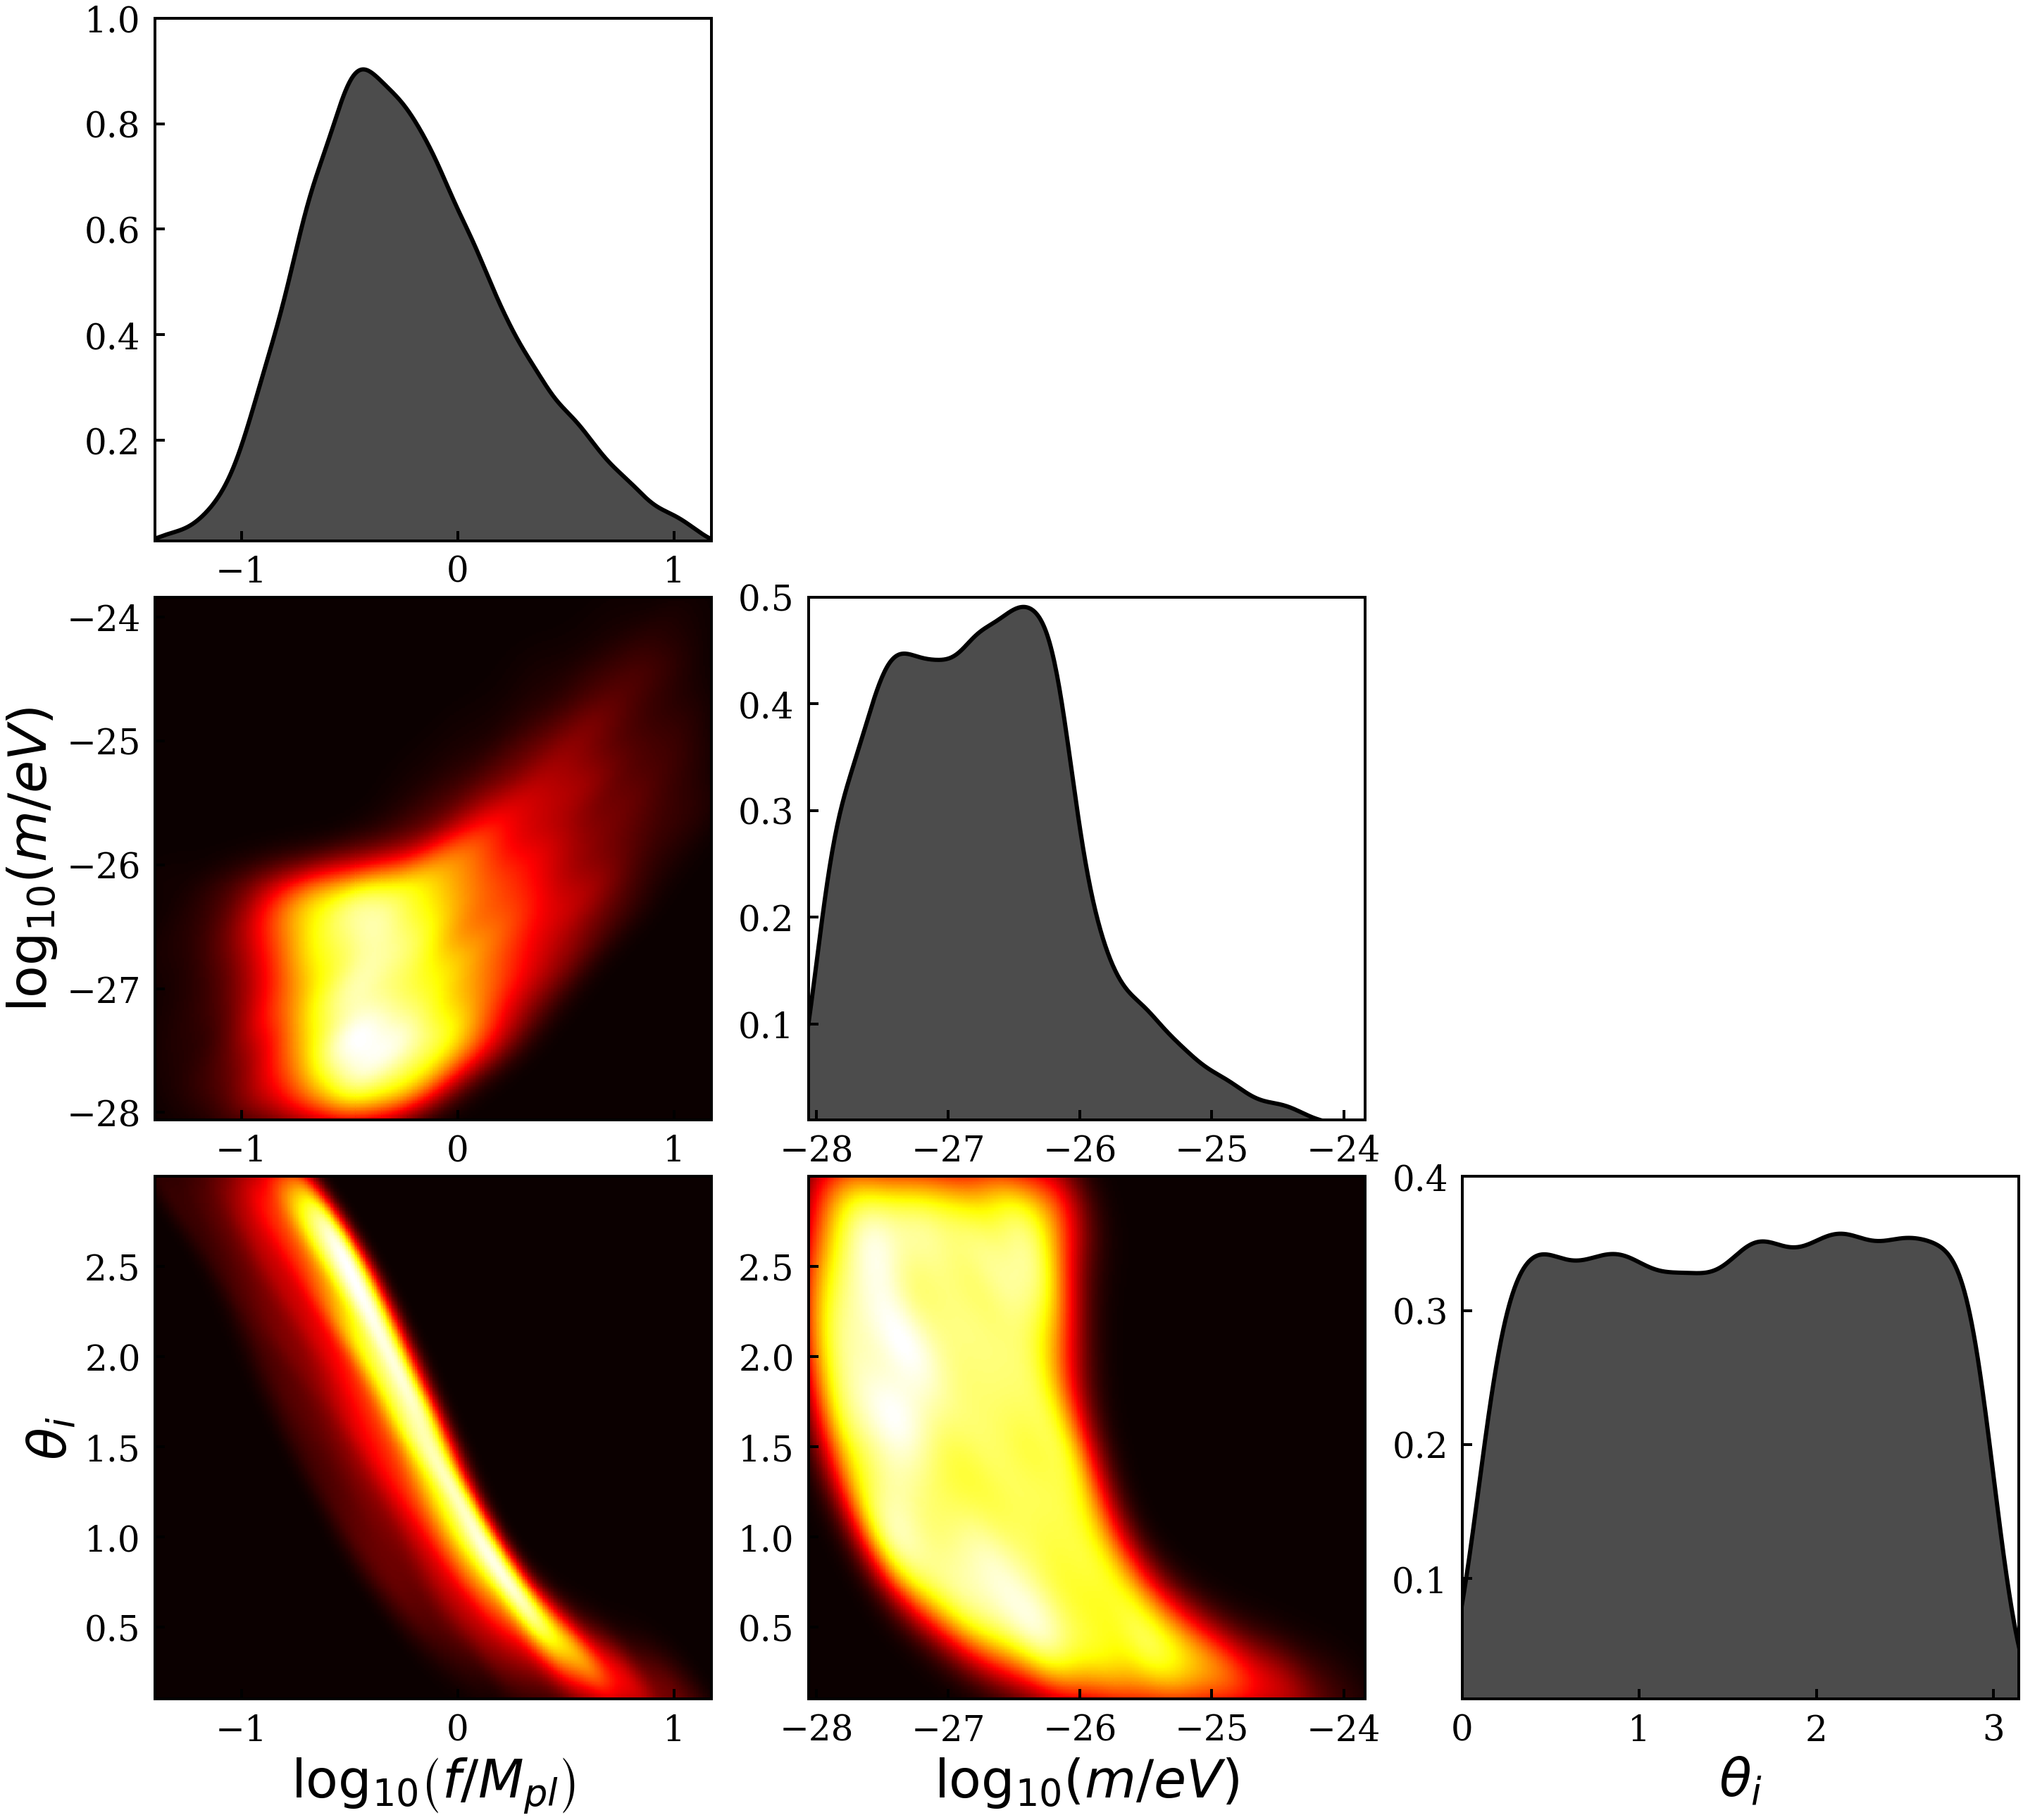

In [4]:
lws = 6
cs = 'k'

plt.figure(figsize=(40,36))

#1D log f
plt.subplot(3, 3, 1)
f_arr = np.linspace(1.1*np.min(logfmpl),1.1*np.max(logfmpl),1e3)
density = gaussian_kde(logfmpl)
plt.plot(f_arr,density(f_arr),lw=lws,c=cs)
plt.fill_between(f_arr,density(f_arr),alpha=0.7,color='k')
plt.xlim([np.min(logfmpl),np.max(logfmpl)])
plt.ylim([0.01,1])
plt.tick_params(which='major',axis='x', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='x', length=7, width=2, direction='in')
plt.tick_params(which='major',axis='y', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='y', length=7, width=2, direction='in')
plt.tick_params(pad=20)


#1D log m
plt.subplot(3, 3, 5)
m_arr = np.linspace(1.1*np.min(logm),0.9*np.max(logm),1e3)
density = gaussian_kde(logm)
plt.plot(m_arr,density(m_arr),lw=lws,c=cs)
plt.fill_between(m_arr,density(m_arr),alpha=0.7,color='k')
plt.xlim([np.min(logm),np.max(logm)])
plt.ylim([0.01,0.5])
plt.tick_params(which='major',axis='x', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='x', length=7, width=2, direction='in')
plt.tick_params(which='major',axis='y', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='y', length=7, width=2, direction='in')
plt.tick_params(pad=20)


#1D Theta
plt.subplot(3, 3, 9)
t_arr = np.linspace(-.1,1.1*np.max(theta),1e3)
density = gaussian_kde(theta)
plt.plot(t_arr,density(t_arr),lw=lws,c=cs)
plt.fill_between(t_arr,density(t_arr),alpha=0.7,color='k')
plt.xlim([0,np.pi])
plt.ylim([0.01,0.4])
plt.xlabel(r'$\theta_i$')
plt.tick_params(which='major',axis='x', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='x', length=7, width=2, direction='in')
plt.tick_params(which='major',axis='y', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='y', length=7, width=2, direction='in')
plt.tick_params(pad=20)


#2D Theta-logf
plt.subplot(3, 3, 7)
plot(logfmpl,theta,300)
plt.ylabel(r'$\theta_i$')
plt.xlabel(r'$\log_{10}{\left(f\left/ \right.M_{pl}\right)}$')
plt.tick_params(which='major',axis='x', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='x', length=7, width=2, direction='in')
plt.tick_params(which='major',axis='y', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='y', length=7, width=2, direction='in')
plt.tick_params(pad=20)


#2D log m log f
plt.subplot(3,3,4)
plot(logfmpl,logm,300)
plt.ylabel(r'$\log_{10}{\left(m\left/ \right.eV\right)}$')
plt.tick_params(which='major',axis='x', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='x', length=7, width=2, direction='in')
plt.tick_params(which='major',axis='y', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='y', length=7, width=2, direction='in')
plt.tick_params(pad=20)


#2D theta log m
plt.subplot(3,3,8)
plot(logm,theta,300)
plt.xlabel(r'$\log_{10}{\left(m\left/ \right.eV\right)}$')
plt.tick_params(which='major',axis='x', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='x', length=7, width=2, direction='in')
plt.tick_params(which='major',axis='y', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='y', length=7, width=2, direction='in')
plt.tick_params(pad=20)


plt.tight_layout()
plt.savefig('../figures-for-paper/priors/priors-f-m-shooting-Smith.png',bbox_inches='tight')

## Uniform Priors from Hill et al. 

        log10z_c = uniform(3.1,4.3)
        fEDE = uniform(0.001,0.5)
        thetai_scf = uniform(0.1,3.1)


In [5]:
logf = np.load("../figures-for-paper/priors/data/log10f_scf-shooting-Us.npy")
logm = np.load("../figures-for-paper/priors/data/log10m_scf-shooting-Us.npy")
theta = np.load("../figures-for-paper/priors/data/thetai_scf-shooting-Us.npy")
use = np.where(logf != 0)
logf, logm, theta = logf[use], logm[use], theta[use]

# Normalize to the Plank mass
logfmpl = np.log10((np.power(10,logf)/(2.435e27)))

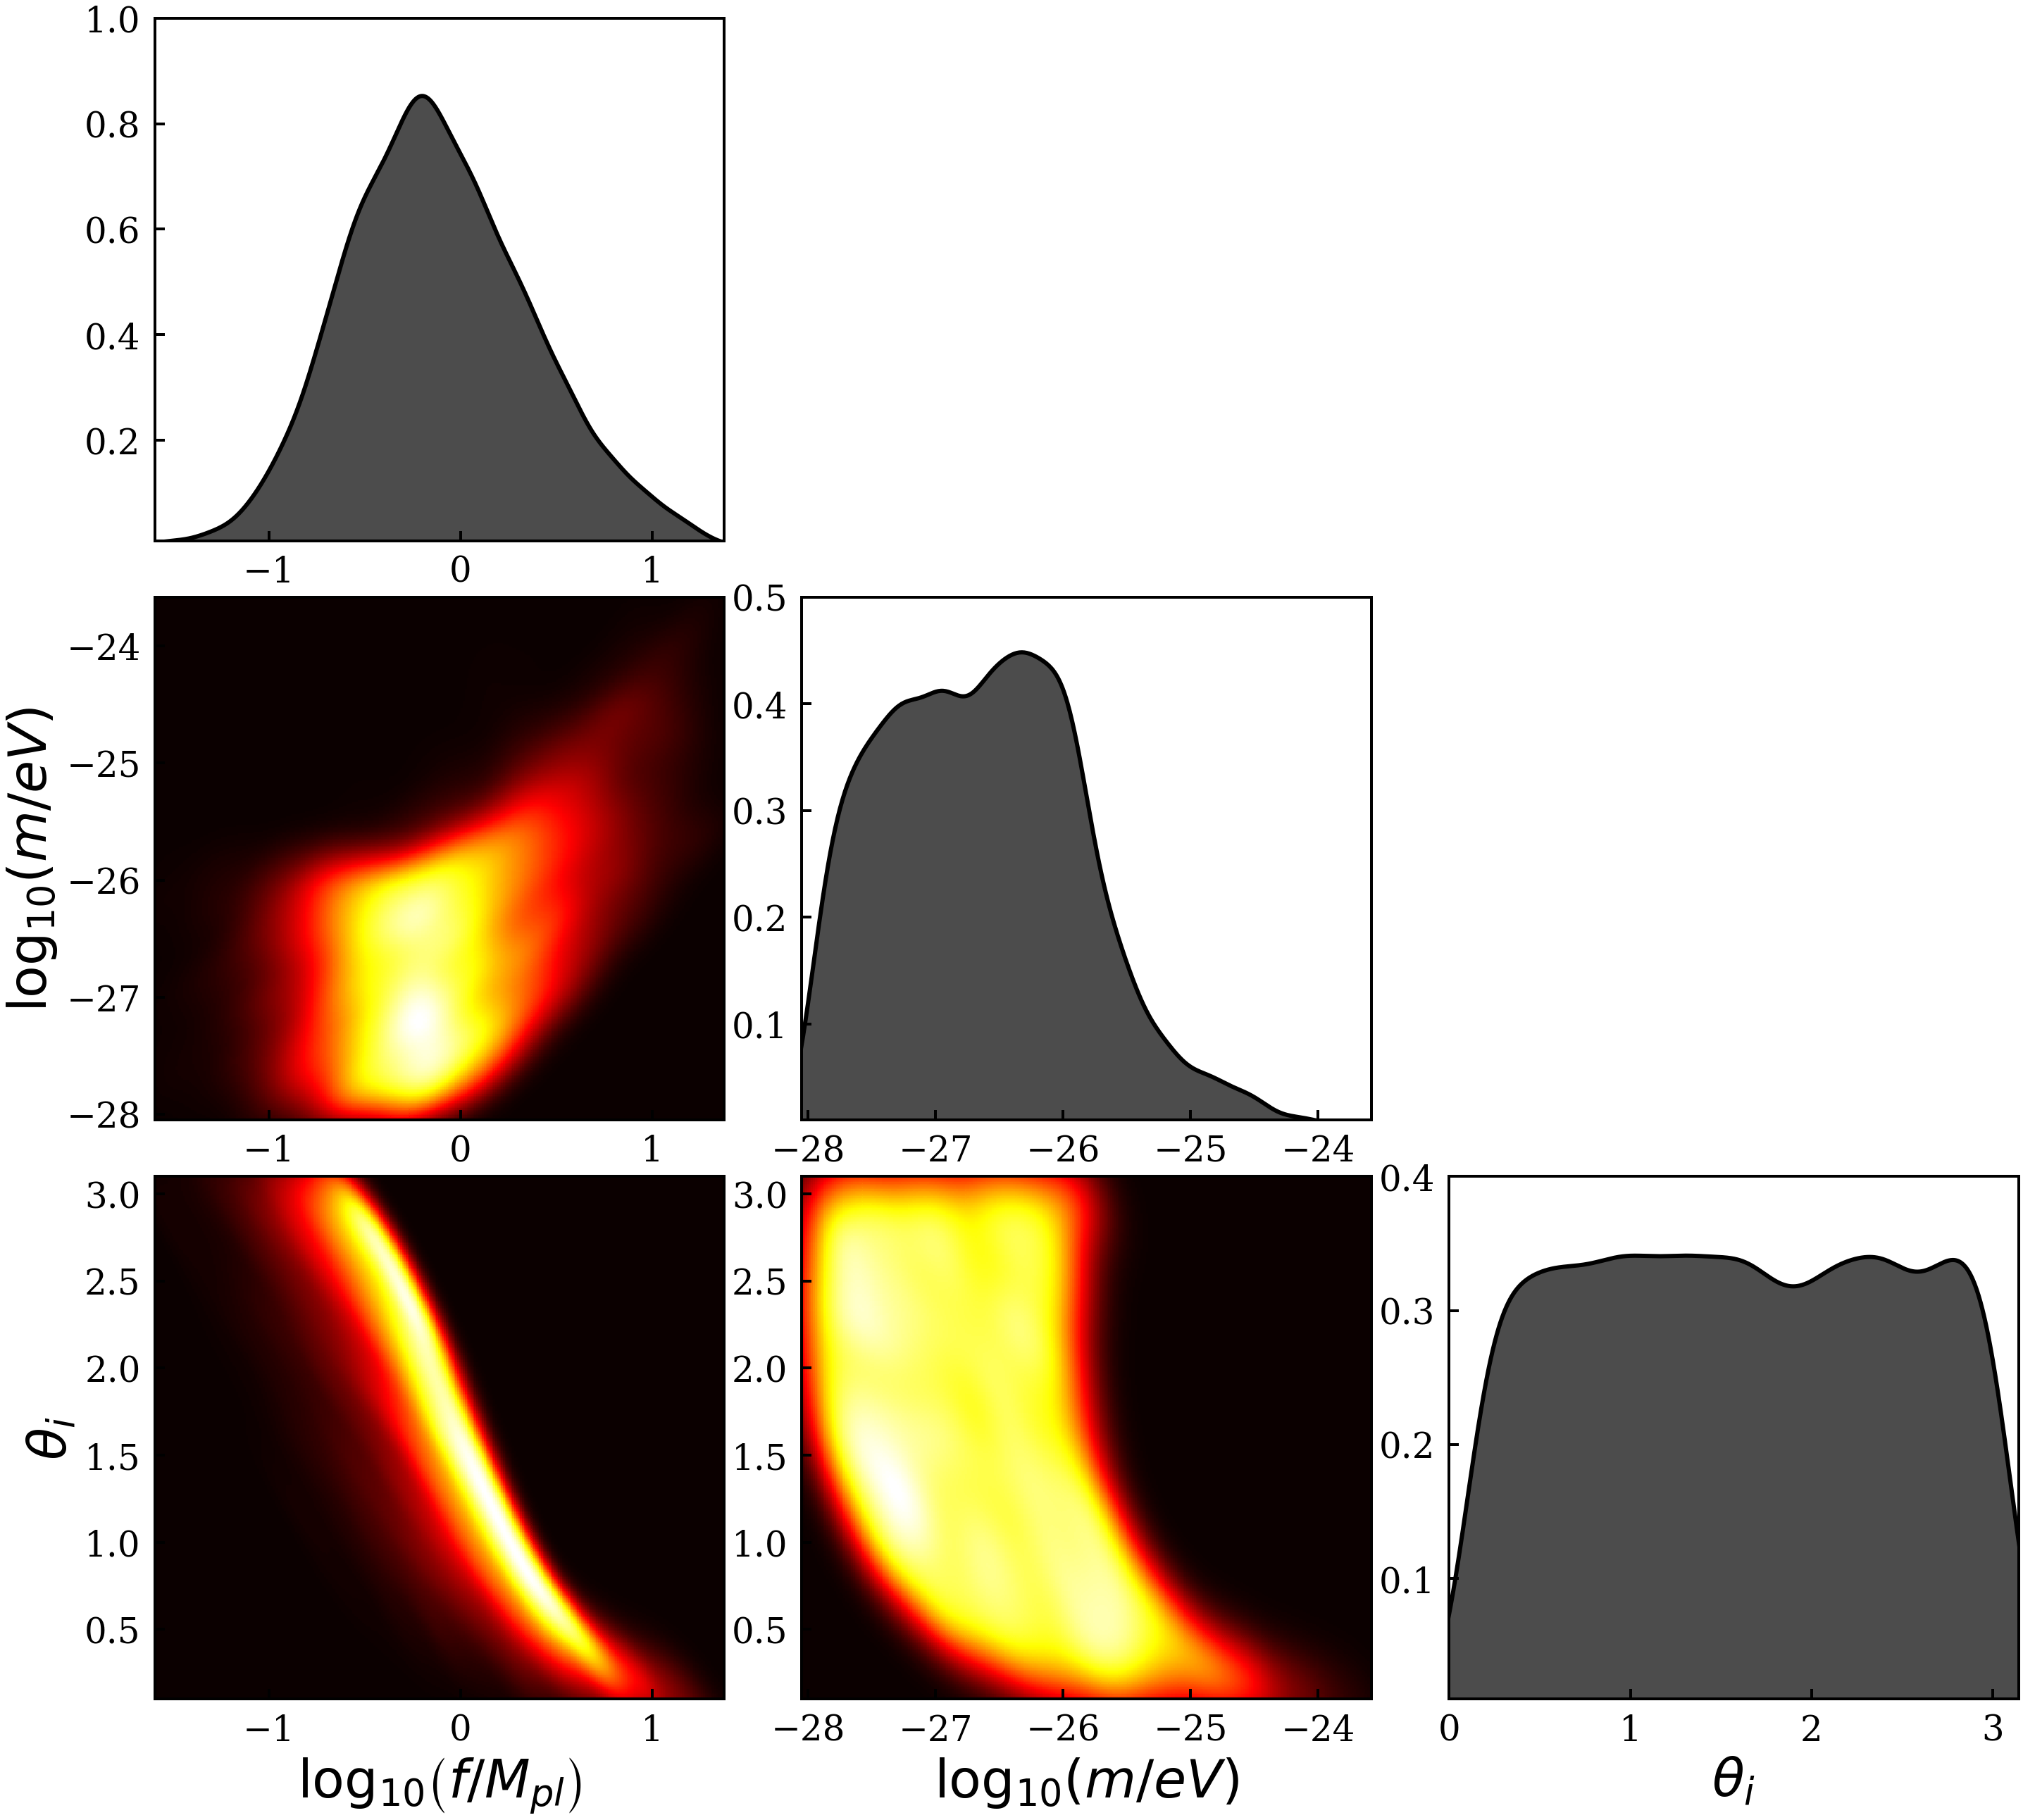

In [6]:
lws = 6
cs = 'k'

plt.figure(figsize=(40,36))

#1D log f
plt.subplot(3, 3, 1)
f_arr = np.linspace(1.1*np.min(logfmpl),1.1*np.max(logfmpl),1e3)
density = gaussian_kde(logfmpl)
plt.plot(f_arr,density(f_arr),lw=lws,c=cs)
plt.fill_between(f_arr,density(f_arr),alpha=0.7,color='k')
plt.xlim([np.min(logfmpl),np.max(logfmpl)])
plt.ylim([0.01,1])
plt.tick_params(which='major',axis='x', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='x', length=7, width=2, direction='in')
plt.tick_params(which='major',axis='y', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='y', length=7, width=2, direction='in')
plt.tick_params(pad=20)


#1D log m
plt.subplot(3, 3, 5)
m_arr = np.linspace(1.1*np.min(logm),0.9*np.max(logm),1e3)
density = gaussian_kde(logm)
plt.plot(m_arr,density(m_arr),lw=lws,c=cs)
plt.fill_between(m_arr,density(m_arr),alpha=0.7,color='k')
plt.xlim([np.min(logm),np.max(logm)])
plt.ylim([0.01,0.5])
plt.tick_params(which='major',axis='x', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='x', length=7, width=2, direction='in')
plt.tick_params(which='major',axis='y', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='y', length=7, width=2, direction='in')
plt.tick_params(pad=20)

#1D Theta
plt.subplot(3, 3, 9)
t_arr = np.linspace(-.1,1.1*np.max(theta),1e3)
density = gaussian_kde(theta)
plt.plot(t_arr,density(t_arr),lw=lws,c=cs)
plt.fill_between(t_arr,density(t_arr),alpha=0.7,color='k')
plt.xlim([0,np.pi])
plt.ylim([0.01,0.4])
plt.xlabel(r'$\theta_i$')
plt.tick_params(which='major',axis='x', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='x', length=7, width=2, direction='in')
plt.tick_params(which='major',axis='y', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='y', length=7, width=2, direction='in')
plt.tick_params(pad=20)

#2D Theta-logf
plt.subplot(3, 3, 7)
plot(logfmpl,theta,300)
plt.ylabel(r'$\theta_i$')
plt.xlabel(r'$\log_{10}{\left(f\left/ \right.M_{pl}\right)}$')
plt.tick_params(which='major',axis='x', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='x', length=7, width=2, direction='in')
plt.tick_params(which='major',axis='y', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='y', length=7, width=2, direction='in')
plt.tick_params(pad=20)

#2D log m log f
plt.subplot(3,3,4)
plot(logfmpl,logm,300)
plt.ylabel(r'$\log_{10}{\left(m\left/ \right.eV\right)}$')
plt.tick_params(which='major',axis='x', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='x', length=7, width=2, direction='in')
plt.tick_params(which='major',axis='y', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='y', length=7, width=2, direction='in')
plt.tick_params(pad=20)

#2D theta log m
plt.subplot(3,3,8)
plot(logm,theta,300)
plt.xlabel(r'$\log_{10}{\left(m\left/ \right.eV\right)}$')
plt.tick_params(which='major',axis='x', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='x', length=7, width=2, direction='in')
plt.tick_params(which='major',axis='y', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='y', length=7, width=2, direction='in')
plt.tick_params(pad=20)

plt.tight_layout()
plt.savefig('../figures-for-paper/priors/priors-f-m-shooting-Us.png',bbox_inches='tight')

## Uniform Priors on Scalar Field Parameters from Hill et al.

        f_scf = uniform(1e26,1e28)
        log10m_scf = uniform(-26,-28)
        thetai_scf = uniform(0.1,3.1)



In [7]:
fEDE = np.load("../figures-for-paper/priors/data/fEDE_no_shooting.npy")
logz_c = np.load("../figures-for-paper/priors/data/log10z_c_no_shooting.npy")
theta = np.load("../figures-for-paper/priors/data/thetai_scf_no_shooting.npy")

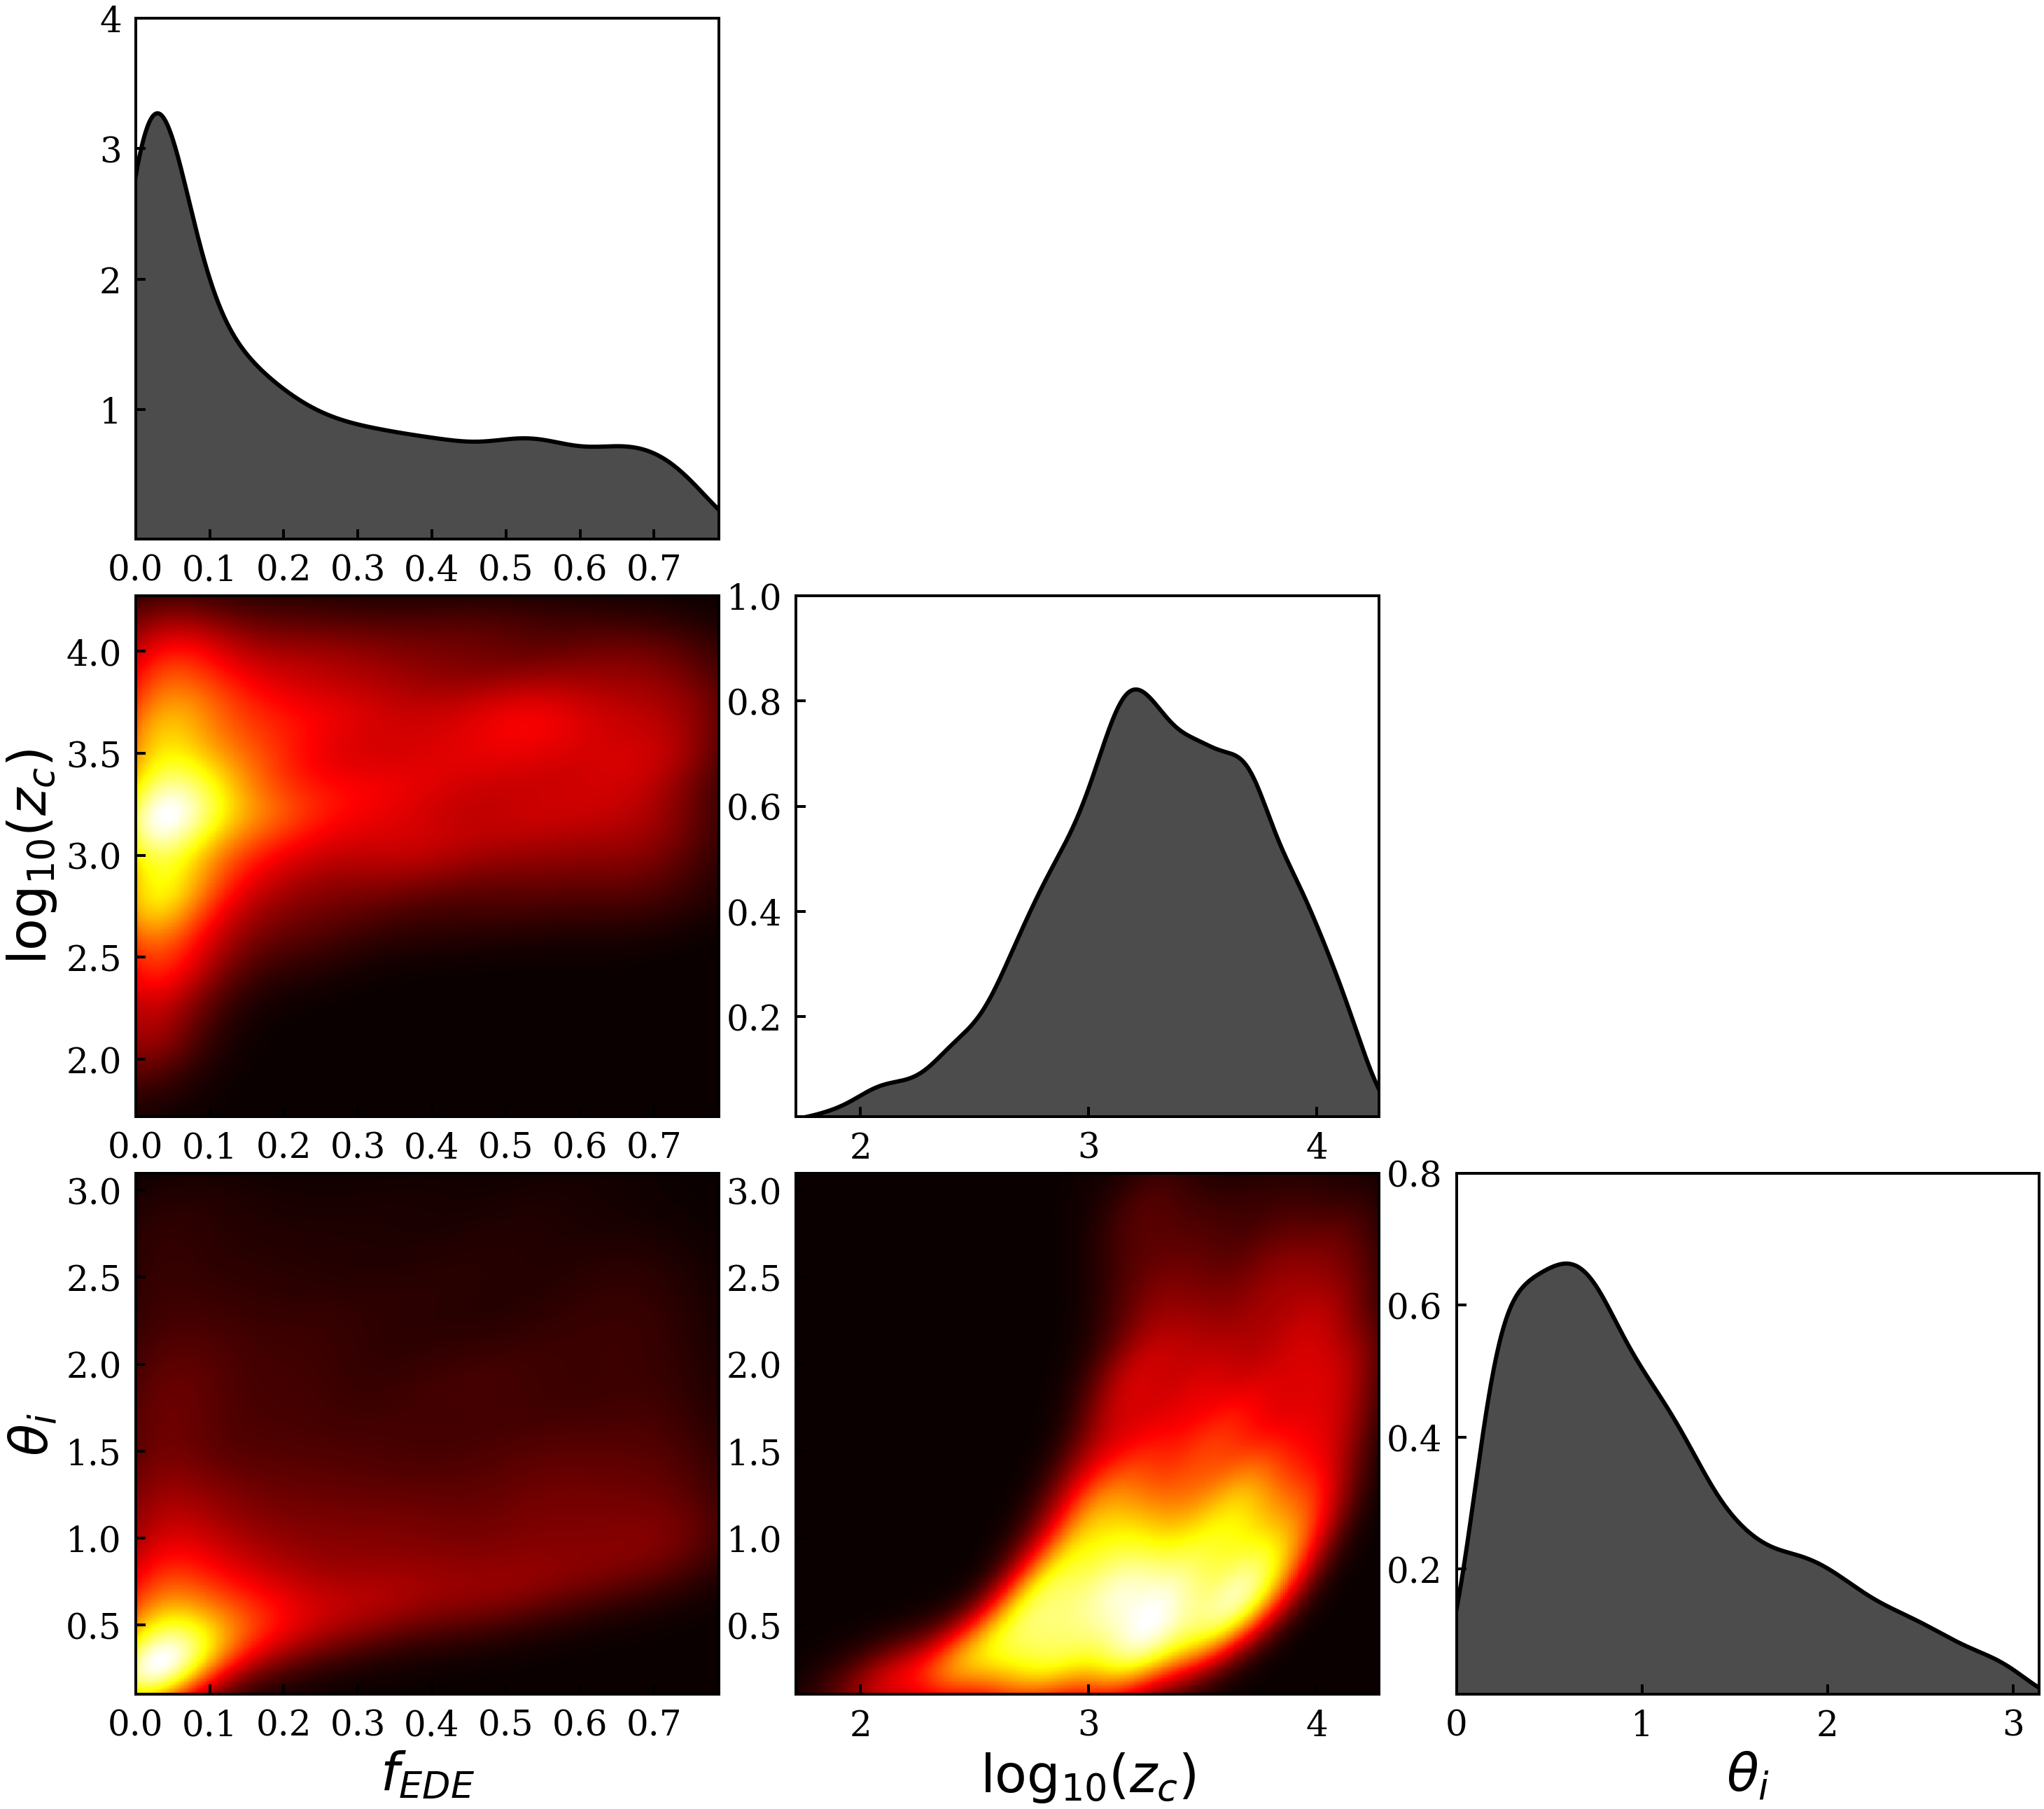

In [8]:
lws = 6
cs = 'k'

plt.figure(figsize=(40,36))

#1D  fEDE
plt.subplot(3, 3, 1)
f_arr = np.linspace(-1,1.1*np.max(fEDE),1e3)
density = gaussian_kde(fEDE)
plt.plot(f_arr,density(f_arr),lw=lws,c=cs)
plt.fill_between(f_arr,density(f_arr),alpha=0.7,color='k')
plt.xlim([0,np.max(fEDE)])
plt.xticks(np.arange(0, np.max(fEDE), .1))
plt.ylim([0.01,4])
plt.tick_params(which='major',axis='x', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='x', length=7, width=2, direction='in')
plt.tick_params(which='major',axis='y', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='y', length=7, width=2, direction='in')
plt.tick_params(pad=20)

#1D log z_c
plt.subplot(3, 3, 5)
m_arr = np.linspace(0.9*np.min(logz_c),1.1*np.max(logz_c),1e3)
density = gaussian_kde(logz_c)
plt.plot(m_arr,density(m_arr),lw=lws,c=cs)
plt.fill_between(m_arr,density(m_arr),alpha=0.7,color='k')
plt.xlim([np.min(logz_c),np.max(logz_c)])
plt.ylim([0.01,1])
plt.tick_params(which='major',axis='x', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='x', length=7, width=2, direction='in')
plt.tick_params(which='major',axis='y', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='y', length=7, width=2, direction='in')
plt.tick_params(pad=20)

#1D Theta
plt.subplot(3, 3, 9)
t_arr = np.linspace(-0.1*np.min(theta),1.1*np.max(theta),1e3)
density = gaussian_kde(theta)
plt.plot(t_arr,density(t_arr),lw=lws,c=cs)
plt.fill_between(t_arr,density(t_arr),alpha=0.7,color='k')
plt.xlim([0,np.pi])
plt.ylim([0.01,0.8])
plt.xlabel(r'$\theta_i$')
plt.tick_params(which='major',axis='x', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='x', length=7, width=2, direction='in')
plt.tick_params(which='major',axis='y', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='y', length=7, width=2, direction='in')
plt.tick_params(pad=20)

#2D Theta-fEDE
plt.subplot(3, 3, 7)
plot(fEDE,theta,300)
plt.xticks(np.arange(0, np.max(fEDE), .1))
plt.ylabel(r'$\theta_i$')
plt.xlabel(r'$f_{EDE}$')
plt.tick_params(which='major',axis='x', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='x', length=7, width=2, direction='in')
plt.tick_params(which='major',axis='y', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='y', length=7, width=2, direction='in')
plt.tick_params(pad=20)

#2D log z_c fEDE
plt.subplot(3,3,4)
plot(fEDE,logz_c,300)
plt.xticks(np.arange(0, np.max(fEDE), .1))
plt.ylabel(r'$\log_{10}{\left(z_c\right)}$')
plt.tick_params(which='major',axis='x', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='x', length=7, width=2, direction='in')
plt.tick_params(which='major',axis='y', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='y', length=7, width=2, direction='in')
plt.tick_params(pad=20)

#2D theta log z_c
plt.subplot(3,3,8)
plot(logz_c,theta,300)
plt.xlabel(r'$\log_{10}{\left(z_c\right)}$')
plt.tick_params(which='major',axis='x', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='x', length=7, width=2, direction='in')
plt.tick_params(which='major',axis='y', length=14, width=4, direction='in')
plt.tick_params(which='minor',axis='y', length=7, width=2, direction='in')
plt.tick_params(pad=20)

plt.tight_layout()
plt.savefig('../figures-for-paper/priors/priors-fEDE-z_c-no-shooting.png',bbox_inches='tight')